In [146]:
import pandas as pd
import numpy as np
import datetime 
from pandas.plotting._matplotlib import converter
converter.register()
from datetime import date
from datetime import timedelta  
import matplotlib.pyplot as plt

In [147]:
#importing excel file and removing rows with null values
df = pd.read_excel(r'./Documents/PO_Tracker_060920.xlsx', sheet_name='PO Tracker')
df = df.dropna(axis=0, subset=['Date Ordered'])
df = df.dropna(axis=0, subset=['Estimated Delivery Date'])

In [148]:
#calculating delivery times 
df['Delivery Time'] = (df['Estimated Delivery Date'] - df['Date Ordered']).dt.days

In [235]:
#calculating total ordered for each category
total_ordered = df.groupby(['Product Category'])['QTY Ordered in EA'].sum()

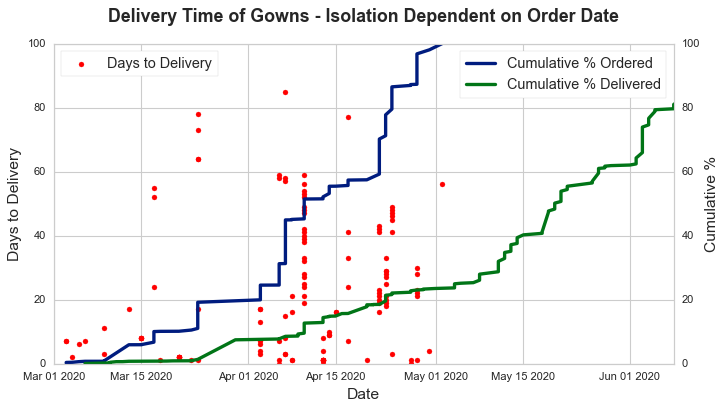

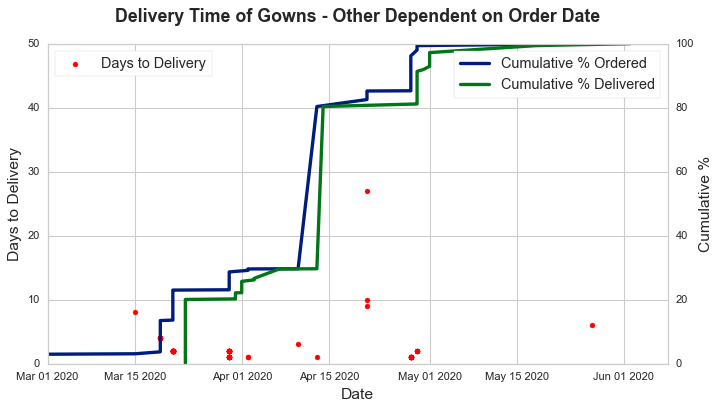

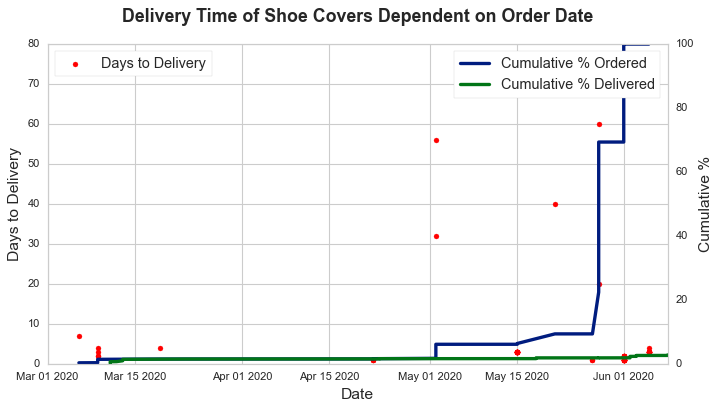

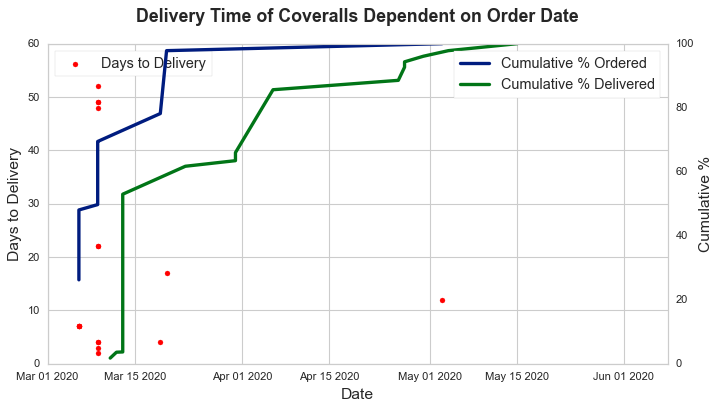

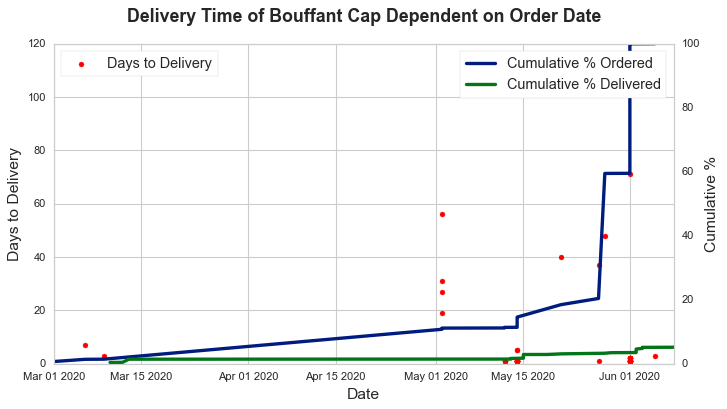

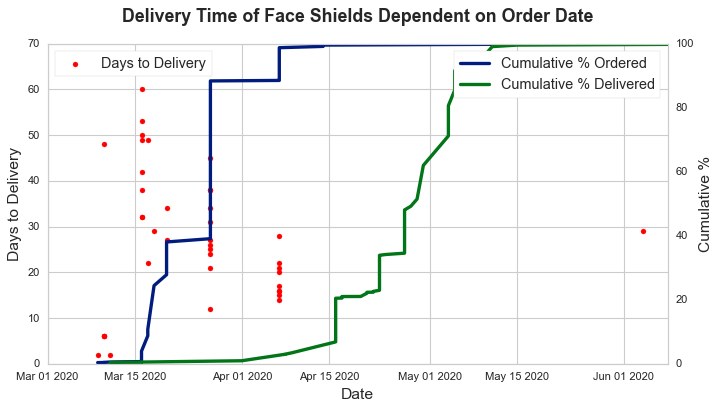

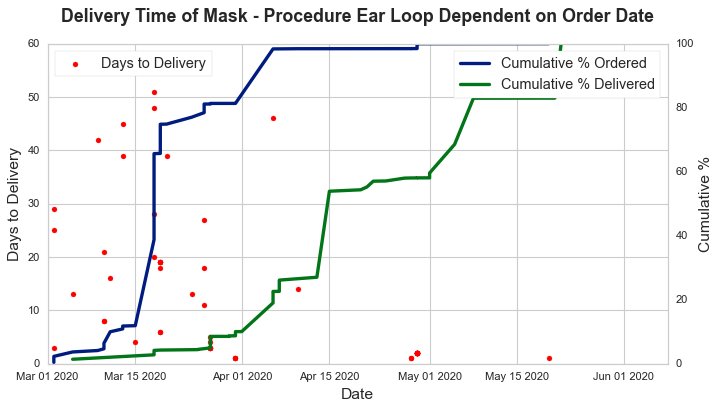

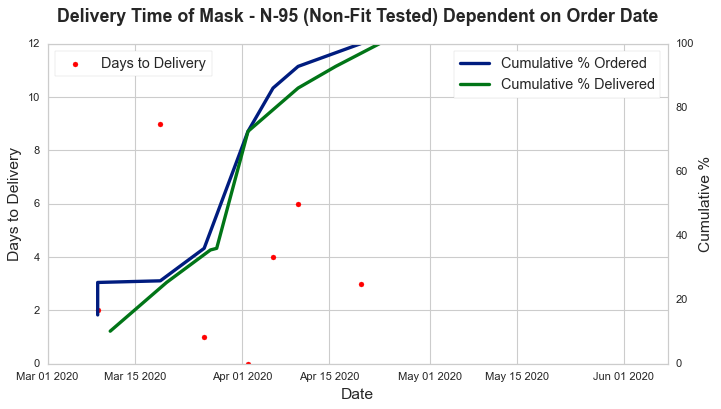

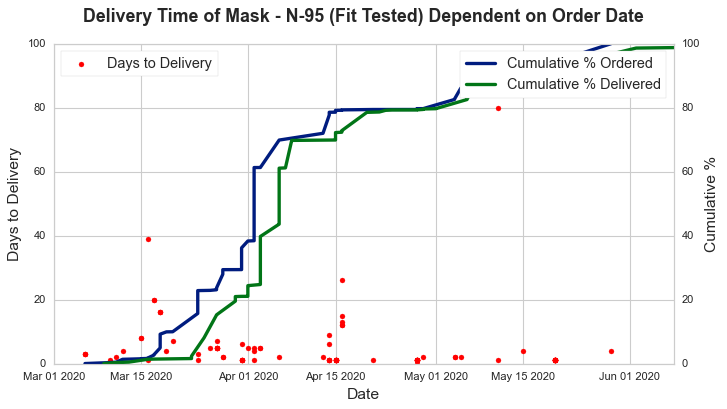

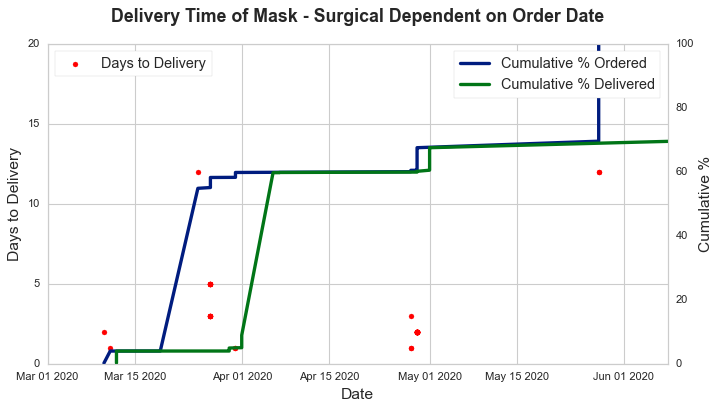

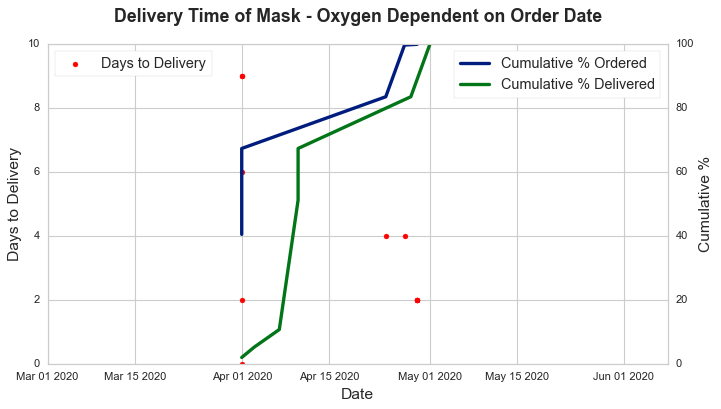

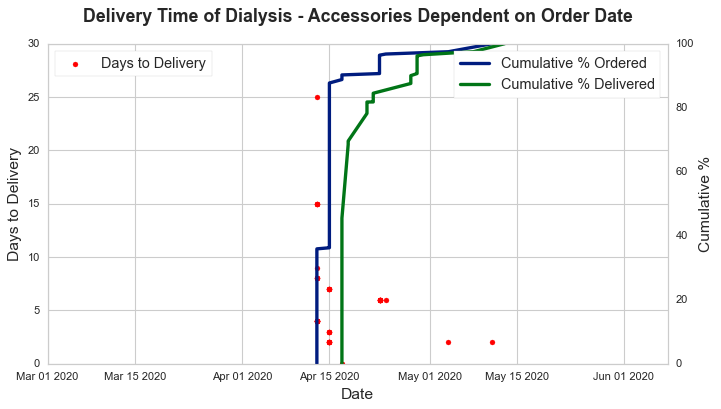

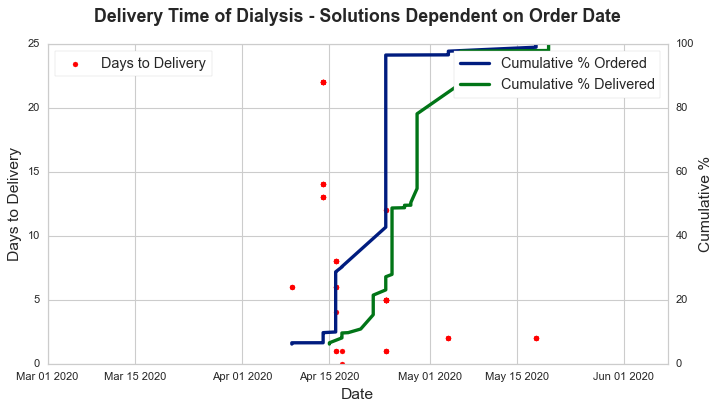

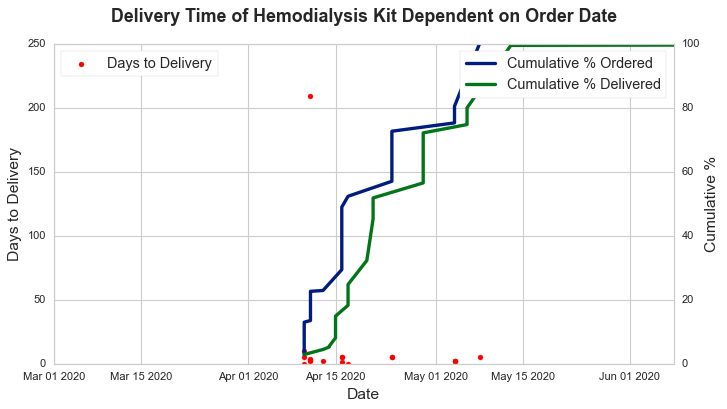

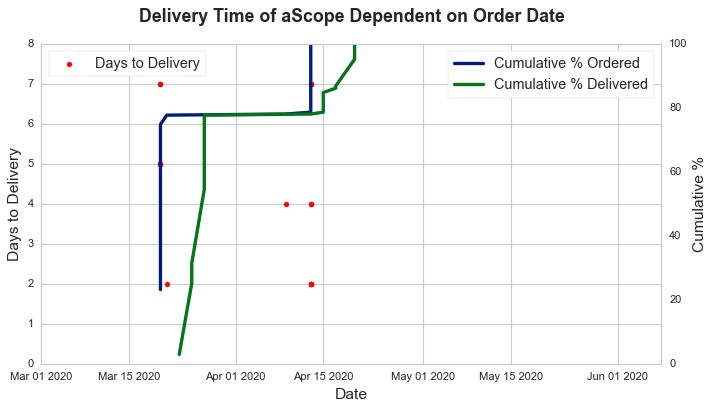

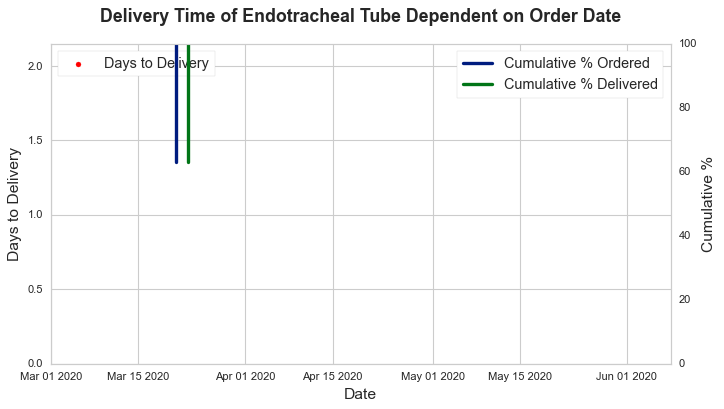

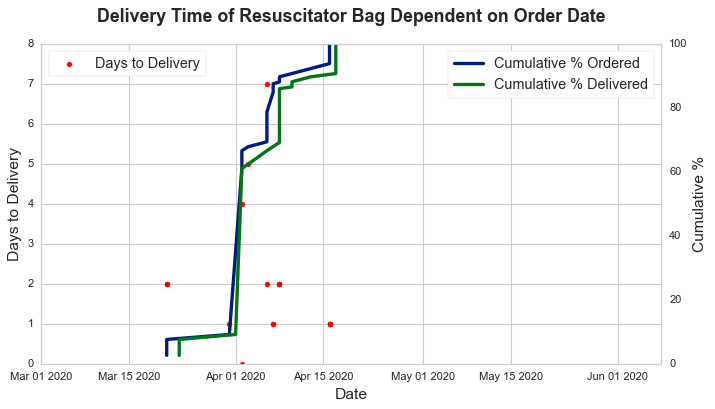

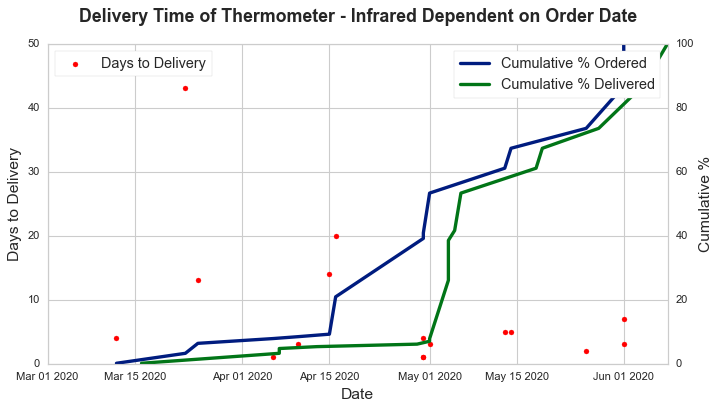

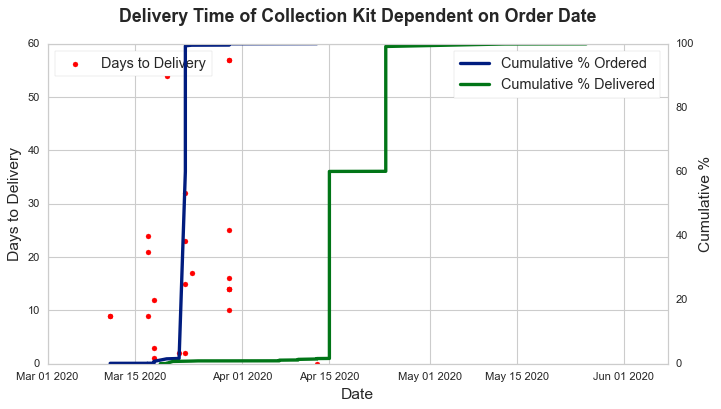

In [242]:
#plotting graphs
ppe = ['Gowns - Isolation', 'Gowns - Other', 'Shoe Covers', 'Coveralls', 'Bouffant Cap', 'Face Shields', 
       'Mask - Procedure Ear Loop','Mask - N-95 (Non-Fit Tested)', 'Mask - N-95 (Fit Tested)', 'Mask - Surgical', 'Mask - Oxygen', 
       'Dialysis - Accessories', 'Dialysis - Solutions', 'Hemodialysis Kit', 
       'aScope', 'Endotracheal Tube', 
       'Resuscitator Bag', 'Thermometer - Infrared', 'Collection Kit']

for category in ppe:
    shoe_covers = df.loc[df['Product Category'] == category].copy()
    shoe_covers['Percent Ordered'] = (shoe_covers['QTY Ordered in EA'] / total_ordered[category])*100

    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    ax2=ax.twinx()

    #ploting cumulative percent ordered
    shoe_covers = shoe_covers.sort_values(by=['Date Ordered'])
    result, temp = [], 0
    for value in shoe_covers['Percent Ordered']:
        temp += value
        result.append(temp)
    shoe_covers["Cumulative Percent Ordered"] = result
    ax2.plot('Date Ordered', 'Cumulative Percent Ordered', data=shoe_covers, linewidth=3, label='Cumulative % Ordered')

    #plotting cumulative percent delivered 
    shoe_covers = shoe_covers.sort_values(by=['Estimated Delivery Date'])
    result, temp = [], 0
    for value in shoe_covers['Percent Ordered']:
        temp += value
        result.append(temp)
    shoe_covers["Cumulative Percent Delivered"] = result
    ax2.plot( 'Estimated Delivery Date', 'Cumulative Percent Delivered', data=shoe_covers, linewidth=3, label='Cumulative % Delivered')

    #plotting delivery times 
    shoe_covers = shoe_covers.sort_values(by=['Date Ordered'])
    ax.scatter('Date Ordered', 'Delivery Time', data=shoe_covers, label='Days to Delivery', color = 'red')


    #setting x-axis label
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 8)])

    # setting y-axis label
    ax.set_ylabel("Days to Delivery", fontsize=14)
    ax.set_ylim(ymin=0)
    ax2.set_ylabel("Cumulative %", fontsize=14)
    ax2.set_ylim(0,100)
    
    #labeling graphs
    ax.legend(fontsize=13, loc=2,frameon=True)
    ax2.legend(fontsize=13,loc=1, frameon=True)
    plt.title('Delivery Time of ' + category + ' Dependent on Order Date', fontsize=16, pad=20, fontweight='bold')
    ax.grid(True)
    ax2.grid(False)
    plt.show()
